In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
df = pd.read_csv("Datasets//bank//bank.csv", delimiter = ";")
df.head()

# Can work with bank-full data as well.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [20]:
df.isna().sum().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<font color = "red"> Input variables:

bank client data:
   - 1 - age (numeric)
   - 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   - 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   - 4 - education (categorical: "unknown","secondary","primary","tertiary")
   - 5 - default: has credit in default? (binary: "yes","no")
   - 6 - balance: average yearly balance, in euros (numeric) 
   - 7 - housing: has housing loan? (binary: "yes","no")
   - 8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:
   - 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  - 10 - day: last contact day of the month (numeric)
  - 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  - 12 - duration: last contact duration, in seconds (numeric)

other attributes:
  - 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  - 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  - 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
  - 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

<img src="https://miro.medium.com/v2/resize:fit:1200/1*hmtbIgxoflflJqMJ_UHwXw.jpeg" width=800>

<Axes: xlabel='age'>

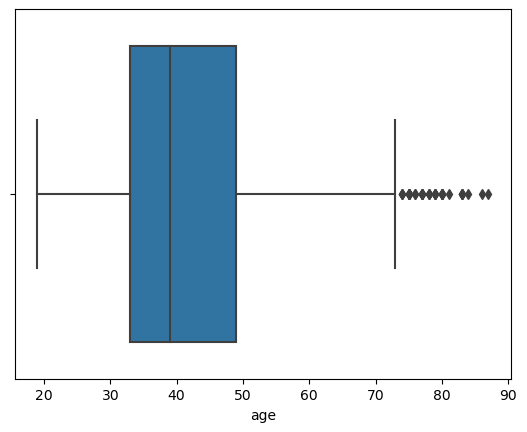

In [22]:
sns.boxplot(data = df, x = df["age"])

In [23]:
# Dropping unnecessary columns

ToDrop = ["contact", "day", "month"]

df2 = df.drop(columns = ToDrop)
df2.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,226,1,-1,0,unknown,no


In [24]:
df3 = pd.get_dummies(df2, columns = ['job', 'marital', 'education', 'poutcome'])
df3.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,no,1787,no,no,79,1,-1,0,no,...,True,False,True,False,False,False,False,False,False,True
1,33,no,4789,yes,yes,220,1,339,4,no,...,True,False,False,True,False,False,True,False,False,False
2,35,no,1350,yes,no,185,1,330,1,no,...,False,True,False,False,True,False,True,False,False,False
3,30,no,1476,yes,yes,199,4,-1,0,no,...,True,False,False,False,True,False,False,False,False,True
4,59,no,0,yes,no,226,1,-1,0,no,...,True,False,False,True,False,False,False,False,False,True


In [25]:
# Convert 'yes'/'no' to True/False for the specified columns
columns_to_convert = ['default', 'housing', 'loan', 'y']
df3[columns_to_convert] = df3[columns_to_convert].applymap(lambda x: True if x == 'yes' else False)
df3.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,False,1787,False,False,79,1,-1,0,False,...,True,False,True,False,False,False,False,False,False,True
1,33,False,4789,True,True,220,1,339,4,False,...,True,False,False,True,False,False,True,False,False,False
2,35,False,1350,True,False,185,1,330,1,False,...,False,True,False,False,True,False,True,False,False,False
3,30,False,1476,True,True,199,4,-1,0,False,...,True,False,False,False,True,False,False,False,False,True
4,59,False,0,True,False,226,1,-1,0,False,...,True,False,False,True,False,False,False,False,False,True


In [26]:
# From actual dataframe, take only those records
# where the age is less than equal to 70
df4 = df3[df3["age"] <= 70]
df4.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,False,1787,False,False,79,1,-1,0,False,...,True,False,True,False,False,False,False,False,False,True
1,33,False,4789,True,True,220,1,339,4,False,...,True,False,False,True,False,False,True,False,False,False
2,35,False,1350,True,False,185,1,330,1,False,...,False,True,False,False,True,False,True,False,False,False
3,30,False,1476,True,True,199,4,-1,0,False,...,True,False,False,False,True,False,False,False,False,True
4,59,False,0,True,False,226,1,-1,0,False,...,True,False,False,True,False,False,False,False,False,True


In [27]:
# Class balancing

# Step 1: Take all rows where y is 'yes'
df4_yes = df4[df4['y'] == True]

# Step 2: Take only 521 rows where y is 'no'
df4_no = df4[df4['y'] == False].sample(n=521, random_state=42)

# Step 3: Combine both dataframes
balanced_df4 = pd.concat([df4_yes, df4_no], axis=0)

# Optionally, you might want to shuffle the combined dataframe
balanced_df4 = balanced_df4.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the shape of the balanced DataFrame
print("Shape of balanced DataFrame:", balanced_df4.shape)


Shape of balanced DataFrame: (1018, 33)


In [28]:
X = balanced_df4.drop("y", axis = 1)
Y = balanced_df4["y"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify = Y)

In [29]:
lr = LogisticRegression()

pipeline = make_pipeline(StandardScaler(), lr)
pipeline.fit(X_train, y_train)  

PipelinePredict = pipeline.predict(X_test)
print(classification_report(y_test, PipelinePredict))

              precision    recall  f1-score   support

       False       0.74      0.87      0.80       157
        True       0.83      0.68      0.75       149

    accuracy                           0.77       306
   macro avg       0.78      0.77      0.77       306
weighted avg       0.78      0.77      0.77       306



In [17]:
rfc = RandomForestClassifier()

pipeline = make_pipeline(StandardScaler(), rfc)
pipeline.fit(X_train, y_train)  

PipelinePredict = pipeline.predict(X_test)
print(classification_report(y_test, PipelinePredict))

              precision    recall  f1-score   support

       False       0.76      0.80      0.78       157
        True       0.78      0.73      0.75       149

    accuracy                           0.77       306
   macro avg       0.77      0.77      0.77       306
weighted avg       0.77      0.77      0.77       306



In [30]:
import gradio as gr

def predict(age, default, balance, housing, loan, duration, campaign, pdays, previous, job, marital_status, education_selection, outcome_selection):
    # Initialize a list with the first 9 features
    combined_input = [age, default, balance, housing, loan, duration, campaign, pdays, previous]

    # Convert radio button selections to one-hot encoding
    job_vector = [1 if job == j else 0 for j in jobs]
    marital_vector = [1 if marital_status == m else 0 for m in marital]
    education_vector = [1 if education_selection == e else 0 for e in education]
    outcome_vector = [1 if outcome_selection == o else 0 for o in outcome]

    # Add the one-hot vectors to the combined input
    combined_input.extend(job_vector)
    combined_input.extend(marital_vector)
    combined_input.extend(education_vector)
    combined_input.extend(outcome_vector)

    # Debugging: Print the total number of features
    # print("Basic Features:", len(combined_input))  # Should be 9
    # print("Job Vector Length:", len(job_vector))  # Should be 12
    # print("Marital Vector Length:", len(marital_vector))  # Should be 3
    # print("Education Vector Length:", len(education_vector))  # Should be 4
    # print("Outcome Vector Length:", len(outcome_vector))  # Should be 4

    # print("Total Features:", len(combined_input))

    # Return the combined input for debugging purposes
    #return combined_input

    # Convert combined_input to the format expected by your model (e.g., numpy array, DataFrame, etc.)
    # For instance, if your model expects a numpy array, you could do:
    model_input = np.array([combined_input])

    # Make a prediction using your model
    prediction = pipeline.predict(model_input)

    # Return the prediction
    return prediction[0]

# Define inputs for columns 0-8
inputs = [
    "number",  # age
    "checkbox",  # default
    "number",  # balance
    "checkbox",  # housing
    "checkbox",  # loan
    "number",  # duration
    "number",  # campaign
    "number",  # pdays
    "number",  # previous
]

# Define options for radio button groups for columns 9-34
jobs = ["admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown"]
marital = ["divorced", "married", "single"]
education = ["primary", "secondary", "tertiary", "unknown"]
outcome = ["failure", "other", "success", "unknown"]

# Extend inputs with radio button groups
inputs.extend([gr.Radio(jobs), gr.Radio(marital), gr.Radio(education), gr.Radio(outcome)])


In [31]:
demo = gr.Interface(
    fn=predict,
    inputs=inputs,
    outputs="text"
)

demo.launch(share=True)

Running on local URL:  http://127.0.0.1:7862

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
